## 1.0 Import Necessary Libraries

In [1]:
import requests
from bs4 import BeautifulSoup

## 2.0 Fetch the Webpage

In [2]:
# # Create custom headers as best practice
# headers = {'User-Agent' : 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36'}
# #
# # Set the url
# url = 'https://finance.yahoo.com/quote/AAPL'

In [3]:
# # Query the website and the server to get the data from yahoo finance page
# # Use get() method on the website
# response = requests.get(url, headers=headers)

In [4]:
# # Check if all previous steps are working correctly
# # Look for 200 in the output
# # 200 is a standard HTTP status code that means the server has successfully fulfilled the request.
# print(response.status_code)

In [5]:
# Perform another check by looking at the text output 
# to see if the  information the same as the website
#print(response.text)

## 3.0 Parse the HTML Content

In [6]:
# # Create soup variable
# soup = BeautifulSoup(response.text, 'html.parser')

In [7]:
# # Search html tags to find title tag for our Stock/ETF
# print(soup.title.text)

## 4.0 Extract the Data

In [8]:
# # Let's query specific parts of the website that we're after
# # Stock Price, After market Price and change 
# # <fin-streamer class="Fw(b) Fz(36px) Mb(-4px) D(ib)" data-symbol="QQQM" data-test="qsp-price" data-field="regularMarketPrice" data-trend="none" data-pricehint="2" value="168.6" active="">168.60</fin-streamer>
# #
# price = soup.find('fin-streamer', {'class' : 'Fw(b) Fz(36px) Mb(-4px) D(ib)'}).text
# #
# # print price from element
# # print(price)

In [9]:
# # Find change in price
# # <fin-streamer class="Fw(500) Pstart(8px) Fz(24px)" data-symbol="QQQM" data-test="qsp-price-change" data-field="regularMarketChange" data-trend="txt" data-pricehint="2" value="0.060012817" active=""><span class="C($positiveColor)">+0.06</span></fin-streamer>
# #
# change = soup.find('fin-streamer', {'class' : 'Fw(500) Pstart(8px) Fz(24px)'}).text
# #
# print(price, change)

## 5.0 Create a Function to Scrap, Fetch and Extract Data

In [10]:
def getData(symbol):
    # Create custom headers as best practice
    headers = {'User-Agent' : 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36'}
    #
    # Set the url
    url = f'https://finance.yahoo.com/quote/{symbol}'
    #
    # Query the website and the server to get the data from yahoo finance page
    # Use get() method on the website
    response = requests.get(url, headers=headers)
    #
    # Parse the html content
    soup = BeautifulSoup(response.text, 'html.parser')
    #
    # Create dictionary that stores price and change data
    stock = {
        'symbol' : symbol,
        'price' : soup.find('fin-streamer', {'class' : 'Fw(b) Fz(36px) Mb(-4px) D(ib)'}).text,
        'change' : soup.find('fin-streamer', {'class' : 'Fw(500) Pstart(8px) Fz(24px)'}).text,
    }
    return stock

# Print out stock
# print(getData('SCHD'))


## 6.0 Create a list of stocks you are interested in

In [11]:
# portfolio = ['QQQM', 'SCHD', 'VOO', 'DGRO', 'VYM', 'MSFT', 'AAPL', 'COST', 'LLY', 'NVDA', 'GOOG', 'SHOP', 'ANET', 'AMZN']

In [12]:
# Create a blank list
# stockdata = []

## 7.0 Create a For Loop 

In [13]:
portfolio = ['QQQM', 'SCHD', 'VOO', 'DGRO', 'VYM', 'MSFT', 'AAPL', 'COST', 'LLY', 'NVDA', 'GOOG', 'SHOP', 'ANET', 'AMZN']
#
# Create empty list to store stock data
stockdata = [] 

for item in portfolio:
    stockdata.append(getData(item))
    print('Getting: ', item)
    
print(stockdata)

Getting:  QQQM
Getting:  SCHD
Getting:  VOO
Getting:  DGRO
Getting:  VYM
Getting:  MSFT
Getting:  AAPL
Getting:  COST
Getting:  LLY
Getting:  NVDA
Getting:  GOOG
Getting:  SHOP
Getting:  ANET
Getting:  AMZN
[{'symbol': 'QQQM', 'price': '168.60', 'change': '+0.06'}, {'symbol': 'SCHD', 'price': '76.27', 'change': '+0.21'}, {'symbol': 'VOO', 'price': '437.99', 'change': '+0.20'}, {'symbol': 'DGRO', 'price': '53.94', 'change': '+0.14'}, {'symbol': 'VYM', 'price': '111.49', 'change': '+0.14'}, {'symbol': 'MSFT', 'price': '388.47', 'change': '+3.84'}, {'symbol': 'AAPL', 'price': '185.92', 'change': '+0.33'}, {'symbol': 'COST', 'price': '683.24', 'change': '+9.66'}, {'symbol': 'LLY', 'price': '642.92', 'change': '+7.20'}, {'symbol': 'NVDA', 'price': '547.10', 'change': '-1.12'}, {'symbol': 'GOOG', 'price': '144.24', 'change': '+0.57'}, {'symbol': 'SHOP', 'price': '81.40', 'change': '+0.10'}, {'symbol': 'ANET', 'price': '252.03', 'change': '+0.29'}, {'symbol': 'AMZN', 'price': '154.62', 'chang

## 8.0 Data Storage

In [14]:
import csv

# Assuming stockdata is a list of dictionaries
# and each dictionary represents a stock item

# Open a file for writing
with open('stockdata.csv', 'w', newline='') as file:
    # Create a CSV writer object
    writer = csv.writer(file)

    # Writing the header (column names)
    writer.writerow(stockdata[0].keys())

    # Writing the data rows
    for stock in stockdata:
        writer.writerow(stock.values())

## 8.1 Load Data

In [15]:
import pandas as pd

df = pd.read_csv('stockdata.csv')
df.head()

,symbol,price,change
0,QQQM,168.60,0.06
1,SCHD,76.27,0.21
2,VOO,437.99,0.20
3,DGRO,53.94,0.14
4,VYM,111.49,0.14


### 8.1.1 Check Data Types

In [16]:
df.dtypes

symbol     object
price     float64
change    float64
dtype: object

## 8.2 Visualize Stock Data

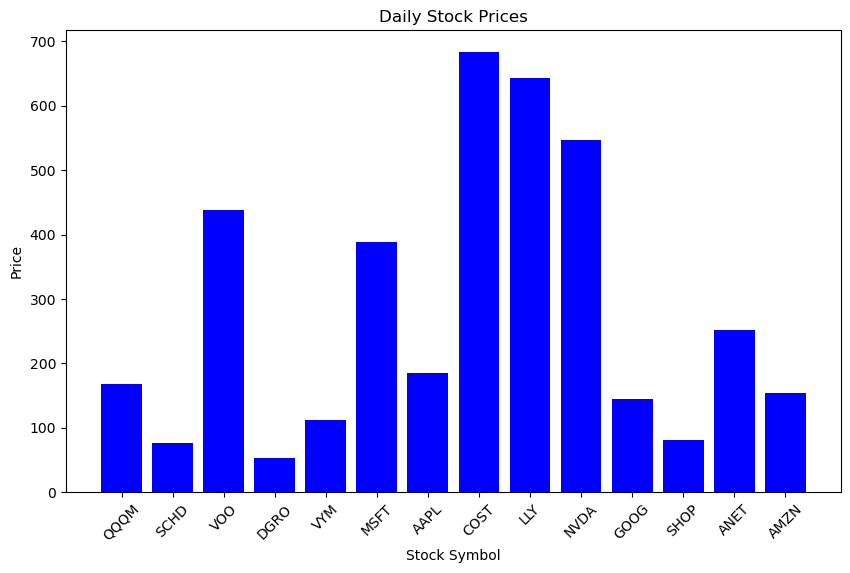

In [17]:
import matplotlib.pyplot as plt

# Creat a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['symbol'], df['price'], color='blue')
plt.xlabel('Stock Symbol')
plt.ylabel('Price')
plt.title('Daily Stock Prices')
plt.xticks(rotation=45)
plt.show();

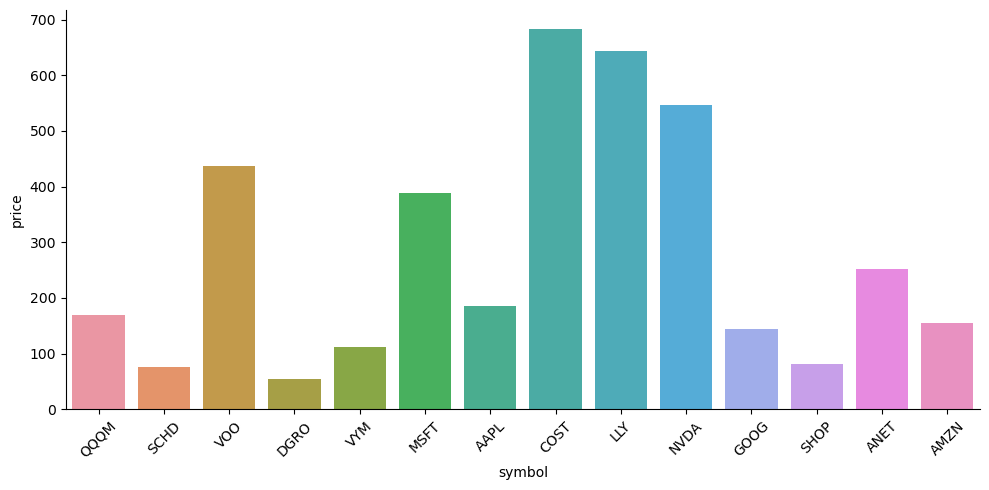

In [18]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# import matplotlib.pyplot as plt
import seaborn as sns

# Set the height and aspect to control the size of the plot
g = sns.catplot(x='symbol',
                y='price',
                data=df,
                kind='bar',
                height=5, aspect=2)  # You can adjust these values as needed

# Rotate x-tick labels
g.set_xticklabels(rotation=45)

# Optimize the layout
plt.tight_layout()

# Display the plot
plt.show()